In [38]:
# import some packages we will need
import pandas as pd
from ipyleaflet import Map, basemaps, Marker
from scrape_otm import LONDON_LAT_LON
import seaborn as sns

In [20]:
df = pd.read_parquet("outputs/parquet/2021-04-03.parquet")
with_land = df[pd.isnull(df.acres) == False]
with_land

,property_id,lat,lon,miles_from_london,cost,acres
39,10164160,50.365879,-4.053420,190.342153,350000.0,500.00
206,10225478,52.091721,-3.662110,158.429406,400000.0,14.00
207,10223205,52.160651,-4.163105,180.274250,495000.0,23.00
212,10221851,52.111789,-4.182077,180.341986,415000.0,2.30
226,9842376,52.296345,-4.060220,178.401450,499995.0,15.50
...,...,...,...,...,...,...
3021,9614800,53.272029,-0.415132,122.738624,650000.0,6.00
3078,8299552,53.480467,-0.429814,137.131000,695000.0,22.00
3715,9432027,51.657290,-0.135248,10.508271,1925000.0,413.00
4580,9779217,52.605181,1.575835,103.807925,695000.0,4.00


In [21]:
points_map = Map(center=LONDON_LAT_LON, basemap=basemaps.Esri.DeLorme, zoom=6)
for row in with_land.itertuples():
    points_map.add_layer(Marker(location=(row.lat, row.lon), dragable=False))
points_map

Map(center=[51.508238335659364, -0.08742724405779281], controls=(ZoomControl(options=['position', 'zoom_in_tex…

<AxesSubplot:xlabel='miles_from_london', ylabel='acres'>

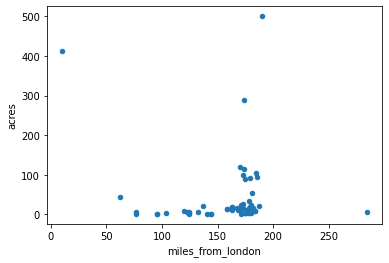

In [25]:
with_land.plot(x="miles_from_london", y="acres", kind="scatter")

<AxesSubplot:xlabel='miles_from_london', ylabel='cost'>

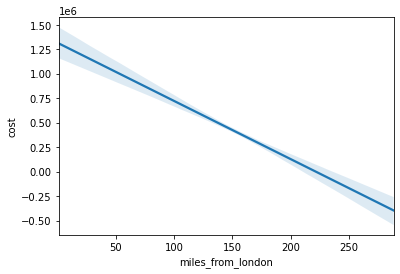

In [42]:
sns.regplot(x=df['miles_from_london'],y=df['cost'], scatter=False) # house price vs distance from london

<AxesSubplot:xlabel='miles_from_london', ylabel='acres'>

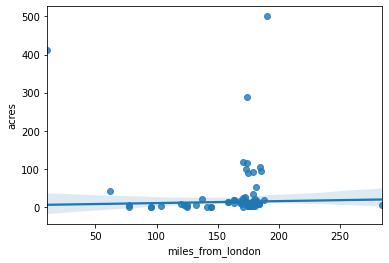

In [47]:
sns.regplot(x=with_land["miles_from_london"], y=with_land["acres"], scatter=True, robust=True) 
# acres vs distance from london
# robust = true to deweight the outliers

In [ ]:
sns.regplot(x=with_land["cost"], y=with_land["acres"], scatter=True, robust=True) 
# as you would expect more acres cost more

<AxesSubplot:xlabel='cost', ylabel='acres'>

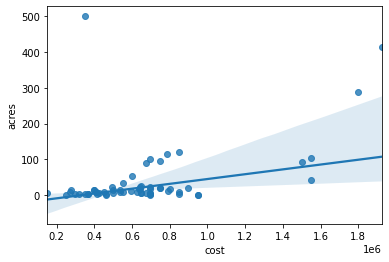